# An introduction to image deconvolution

In microscopy images are commonly distorted because of the nature of the optical system, the microscope. A biological structure emitting photons will visually not appear in an image of the scene 100%ly reflecting reality. The image will be blurred, convolved with the point-spread-function (PSF) of the optical setup. If we know the PSF, it is technically possible to _undo_ this convolution to some degree.

In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.data import cells3d
from skimage.filters import gaussian
from scipy.ndimage import convolve
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt

To demonstrate convolution and deconvolution, we will for a moment assume that his image showing a nucleus reflects reality in the biological sample.

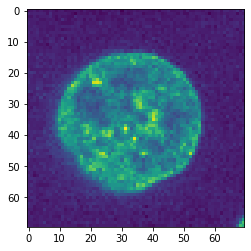

In [2]:
image = cells3d()[30,1,120:190,80:150]
imshow(image)

Furthermore, we construct an artifical PSF image. We start with a perfect PSF image, which is black (`0`) in all pixels except one, typically but not neccessarily in the center.

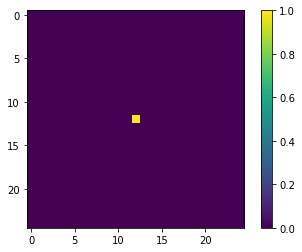

In [3]:
perfect_psf = np.zeros( (25,25) )
perfect_psf[12, 12] = 1

imshow(perfect_psf, colorbar=True)

Note that in the above example the total intensity in the image is 1. Also the blurred image shown next will approximately have a total intensity of 1. This is crucial when doing deconvolution later, because this makes it possible that the total intensity in an image (or any imaged biological structure) will not change through the deconvolution.

From this perfect PSF we derive a more realistic example PSF by blurring it with a Gaussian blur.

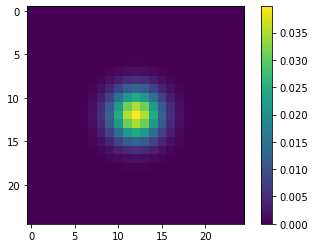

In [4]:
psf = gaussian(perfect_psf, sigma=2)

imshow(psf, colorbar=True)

## Convolution
As introduced in the section about [image filtering](image-filtering:convolution), convolution is the process of combining every pixel value of a given input image with neighboring pixels weighted according to the PSF.

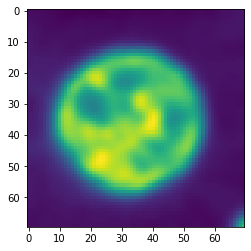

In [5]:
convolved = convolve(image, psf)

imshow(convolved)

## Deconvolution
One common algorithm to restore the original image from the convolved image is [Richardson-Lucy deconvolution](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution) which is implemented as [SimpleITK's RichardsonLucyDeconvolutionImageFilter](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1RichardsonLucyDeconvolutionImageFilter.html). Here we use a convenience layer which is part of [napari-simpleitk-image-processing].

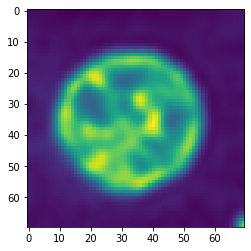

In [6]:
number_of_iterations = 10
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

imshow(deconvolved)

As you can see, this deconvolved image is not equal to the original image shown above. Deconvolution is no magic. It is an image processing filter and all filters have limitations. Furthermore, in case of this deconvolution algorithm, the result depdens on the number of iterations. We can empirically find a good number for this parameter by testing different values.

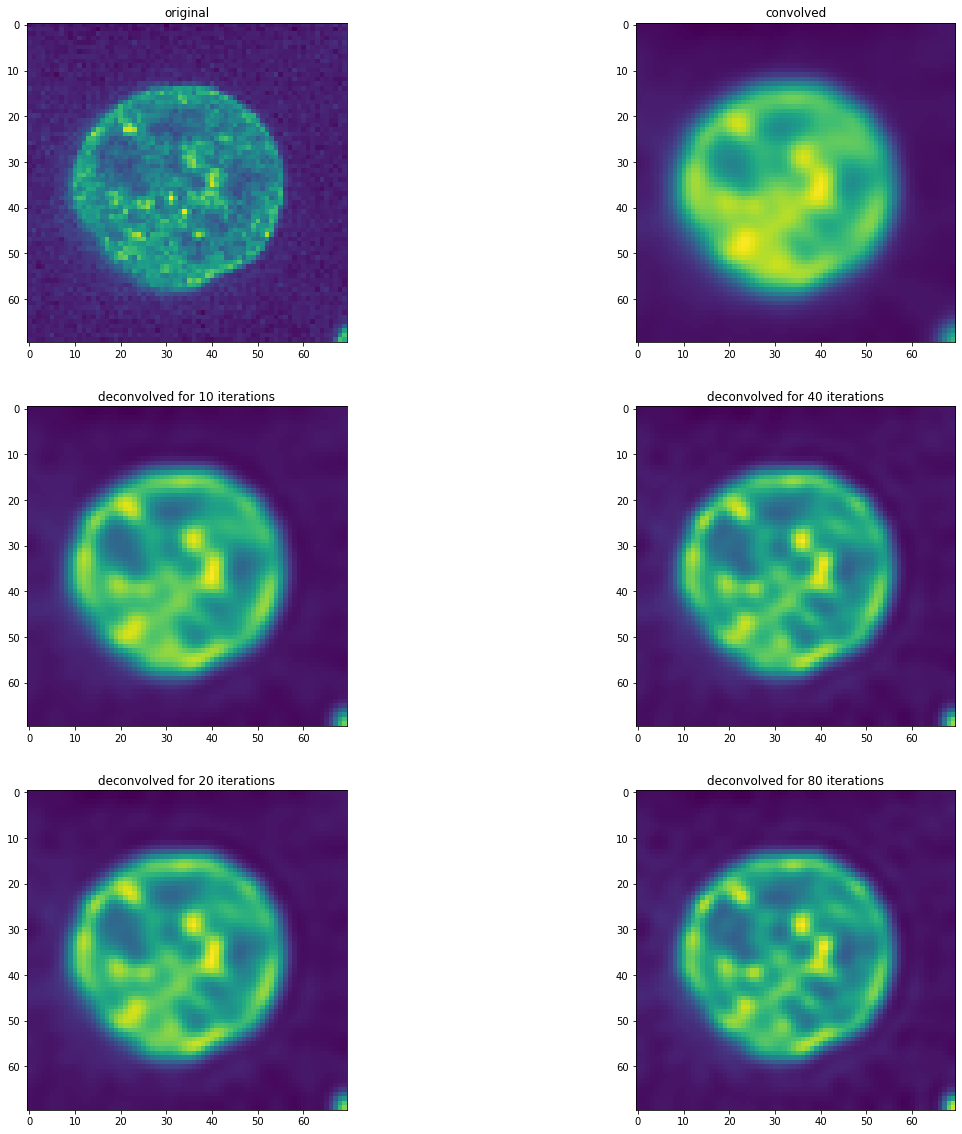

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))

imshow(image, plot=axs[0, 0])
axs[0,0].set_title("original")

imshow(convolved, plot=axs[0, 1])
axs[0,1].set_title("convolved")

for i, number_of_iterations in enumerate([10, 20, 40, 80]):

    deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

    axis = axs[(i) % 2 + 1, int((i) / 2)]
    imshow(deconvolved, plot=axis)
    
    axis.set_title("deconvolved for " + str(number_of_iterations) + " iterations")

# Exercise
Program a for loop that deconvolves the `convolved` image using different `number_of_iterations` and determing the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) between the original image and the deconvolved image.
Hint: You can use [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).